In [1]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squidpy as sq

In [2]:
slice1 = anndata.read_h5ad('/SABench/Data/SCC_processed/SCC_P2_rep0.h5ad')
slice2 = anndata.read_h5ad('/SABench/Data/SCC_processed/SCC_P2_rep1.h5ad')

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: Im

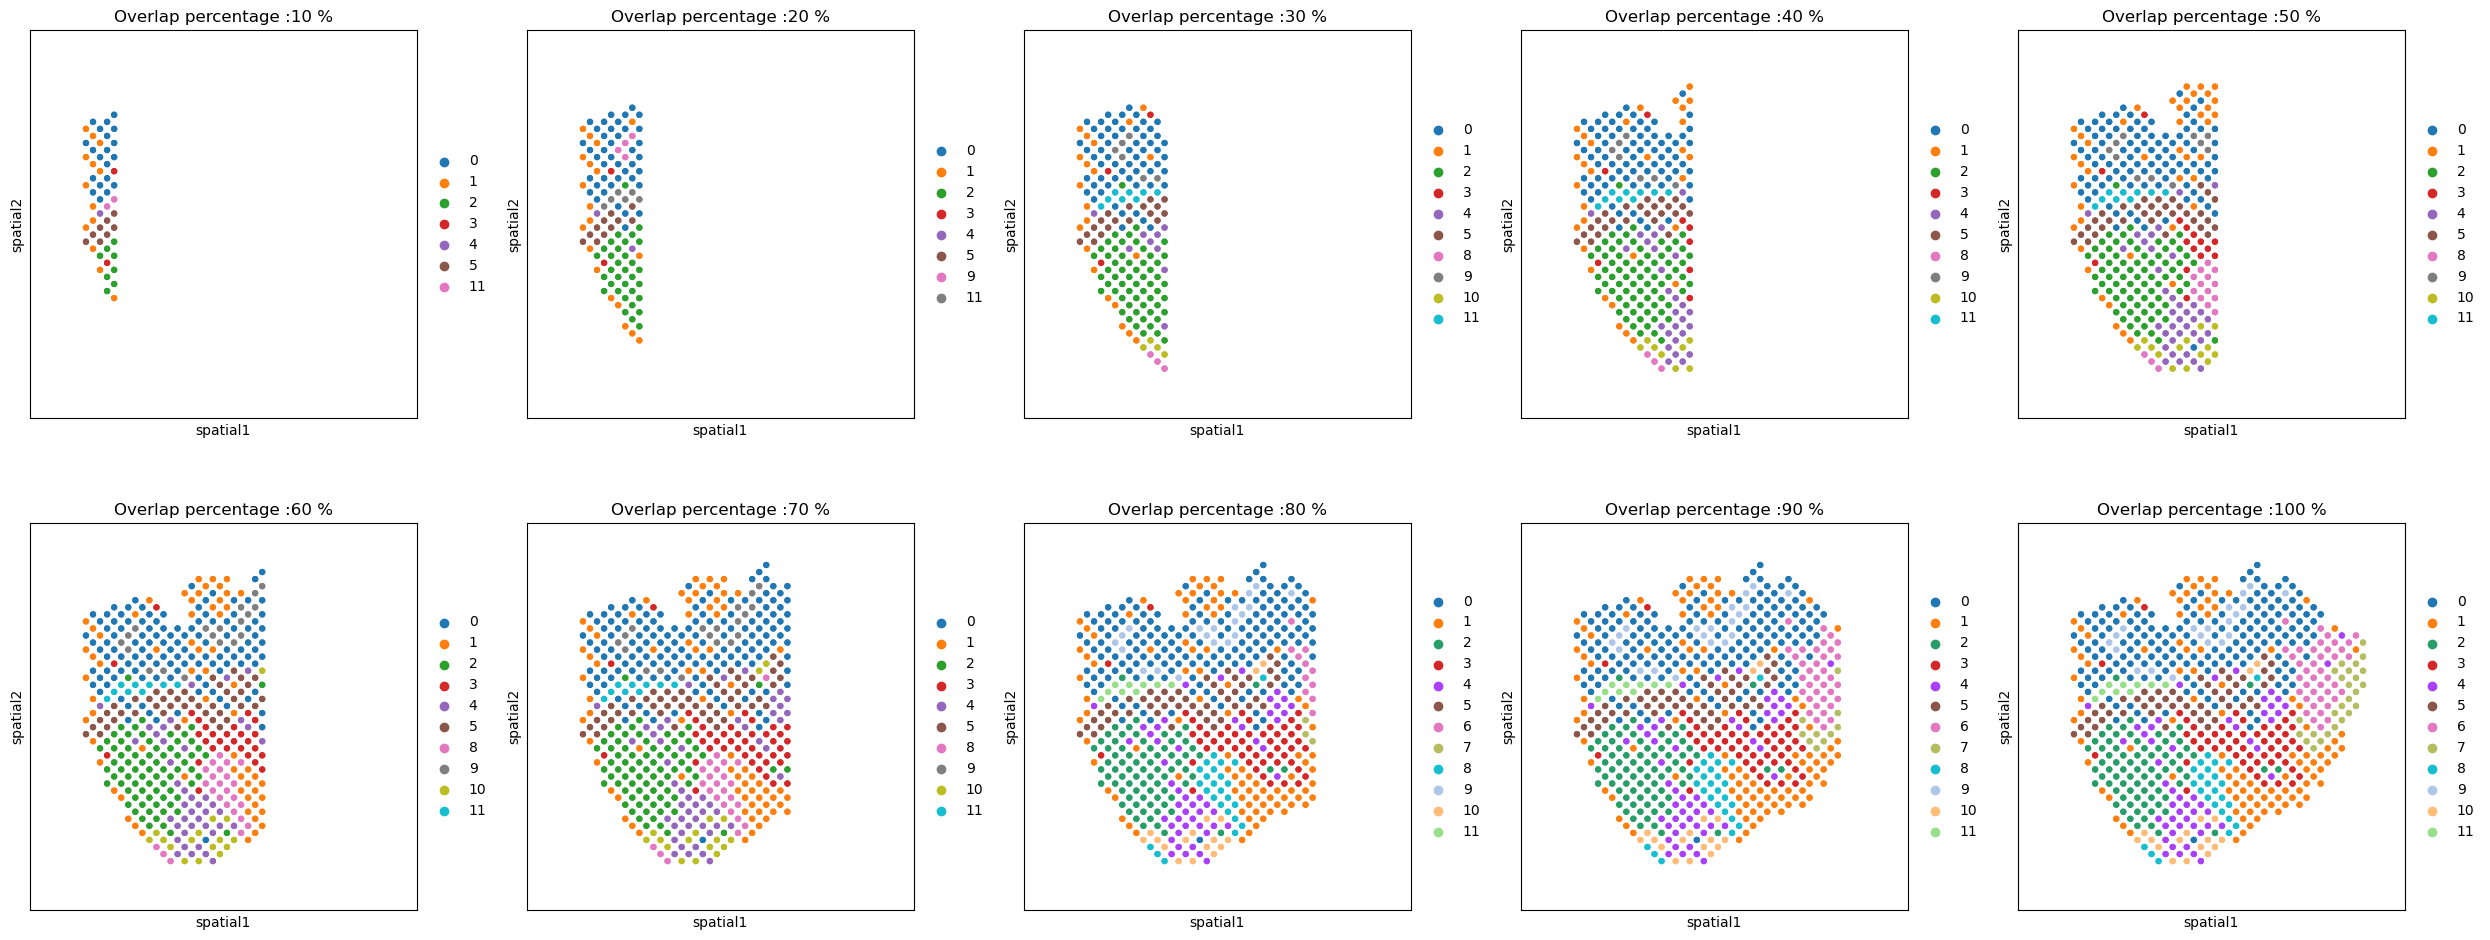

View of AnnData object with n_obs × n_vars = 664 × 17138
    obs: 'Region'
    obsm: 'spatial'

In [7]:
def crop_adata(slice,overlap_percentage,save_path):
 
    ad = slice.copy()
    
    x_coords = ad.obsm['spatial'][:, 0]

    x_min = np.min(x_coords)
    x_max = np.max(x_coords)
    
    x_threshold = x_min + (x_max - x_min) * (overlap_percentage/100)
        
    # 
    indices = np.where(x_coords < x_threshold)[0]
    cropped_ad = ad[indices]
    cropped_ad.write_h5ad(save_path)
    return cropped_ad

percentage = [i for i in range(10, 101, 10)]
fig, axs = plt.subplots(2, 5, figsize=(25, 10)) 
axs=axs.flatten()
for index,ratio in enumerate(percentage):
    new_slice = crop_adata(slice2, ratio, f'/SABench/Data/SCC_cropped/SCC_P2_rep1_cropped_{ratio}%.h5ad')
   
    # 
    sq.pl.spatial_scatter(new_slice,library_id="spatial",shape=None,color="Region",wspace=1,ax=axs[index],size=50)

    #axs[index].invert_yaxis()

    axs[index].set_title(f'Overlap percentage :{ratio} %')

    x_limits = (0,55)
    y_limits = (-5,50)
    axs[index].set_xlim(x_limits)
    axs[index].set_ylim(y_limits)
plt.tight_layout()
plt.show()

crop_adata(slice1, 100, f'/SABench/Data/SCC_cropped/SCC_P2_rep0_cropped_100%.h5ad')